In [1]:
# Custome Dataset NoteBook
#-----------------------------------------------------

# Depending on what you are working on, vision, text, audio, recommendation, you will want to look into each of pytorch libraries for existing data 
# loading functions and customizable data loading functions

In [2]:
# 0. importing pytorch and setting up device-agnostic code

import torch
from torch import nn

#Note: PyTorch 1.10.0+ is required for this course
torch.__version__

'2.1.0+cu118'

In [3]:
# set up the device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# 1. get data
# Our dataset is a subset of the food 101 dataset 
# food 101 starts 101 different classes of food.
# our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

#----- why do this ? --------------

# When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary. 

# The whole point is to speed up how fast you can experiment

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # download pizzaa, steak, sushi dat
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak and sushi data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists... skipping download


In [6]:
## 2. Becoming one with the data (data preparation and data exploration)
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [8]:
# set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [9]:
#2.1 Visualizing and image
# -- Lets write some code:
# 1. Get all of the image paths
# 2. Pick a radom image path using Python's random.choice()
# 3. Get the image class name using `pathlib.Path.parent.stem`
# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
# 5. We will then show the image and print metadata

The random image file name we choiced: [data\pizza_steak_sushi\train\pizza\2885796.jpg]
The Class name of the random image file we choiced [pizza]
Image height: 512
Image width: 512


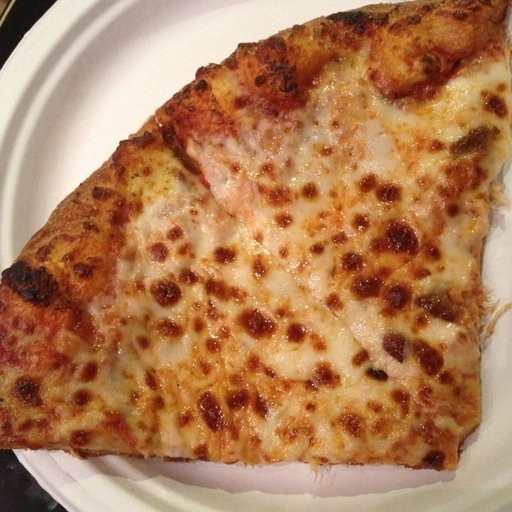

In [10]:
import random
from PIL import Image
# Set seed 
# random.seed(42)

# 1. Get all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image paths
random_image_path = random.choice(image_path_list)

# 3. Get the image class name using `pathlib.Path.parent.stem`
image_class = random_image_path.parent.stem

# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
img = Image.open(random_image_path)

# 5. print the metadata
print(f"The random image file name we choiced: [{random_image_path}]")
print(f"The Class name of the random image file we choiced [{image_class}]")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class: pizza | Image shape: (512, 512, 3) -> [height, width, color_channels]')

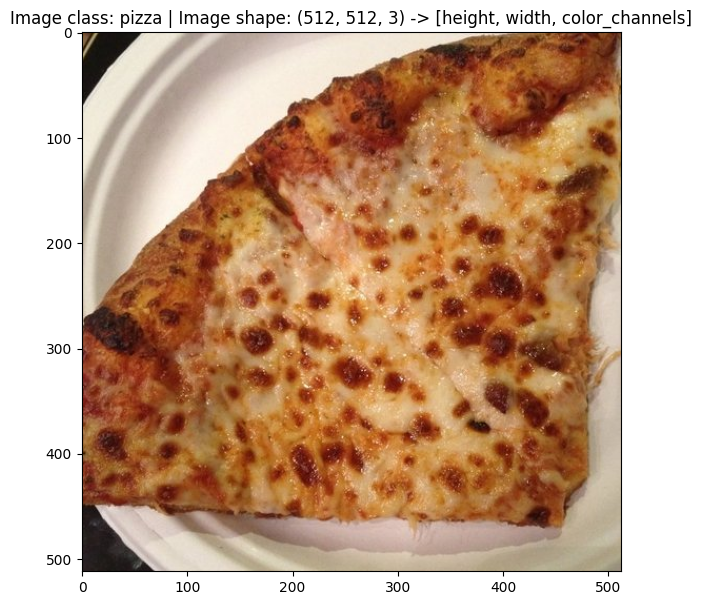

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into array [IMPORTANT]
image_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> [height, width, color_channels]")

In [12]:
## 3. Transforming data into the tensor format
# Before we can use our image data with pytorch:
# 1. Turn your target data into tensors (in our case, numerical representation of our images).
# 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DAtaLoader`, 
#    we'll call these `Dataset` and `DataLoader`.

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
# 3.1 transforming data with [torchvision.transforms]
# -- Write a transform for image --
# ?? nn.sequential Vs. transforms.Compose?? 
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [15]:
transformed_data = data_transform(img)
transformed_data

tensor([[[0.4196, 0.3333, 0.1098,  ..., 0.4471, 0.4549, 0.3961],
         [0.4118, 0.1961, 0.0824,  ..., 0.4627, 0.4157, 0.4118],
         [0.3098, 0.0980, 0.0824,  ..., 0.4235, 0.3765, 0.4863],
         ...,
         [0.1529, 0.1373, 0.1333,  ..., 0.7098, 0.6941, 0.6902],
         [0.1529, 0.1373, 0.1255,  ..., 0.6784, 0.6784, 0.6667],
         [0.1569, 0.1412, 0.1294,  ..., 0.6745, 0.6471, 0.6157]],

        [[0.3098, 0.2824, 0.0902,  ..., 0.2196, 0.2275, 0.2078],
         [0.3412, 0.1725, 0.0784,  ..., 0.2314, 0.1922, 0.2549],
         [0.2706, 0.0902, 0.0784,  ..., 0.1922, 0.1647, 0.3490],
         ...,
         [0.1176, 0.1098, 0.1098,  ..., 0.6706, 0.6510, 0.6510],
         [0.1255, 0.1176, 0.1098,  ..., 0.6392, 0.6392, 0.6353],
         [0.1255, 0.1216, 0.1098,  ..., 0.6471, 0.6196, 0.5804]],

        [[0.1961, 0.1843, 0.0706,  ..., 0.0941, 0.1059, 0.1294],
         [0.2275, 0.1176, 0.0588,  ..., 0.1020, 0.0980, 0.1961],
         [0.1843, 0.0667, 0.0627,  ..., 0.0863, 0.0863, 0.

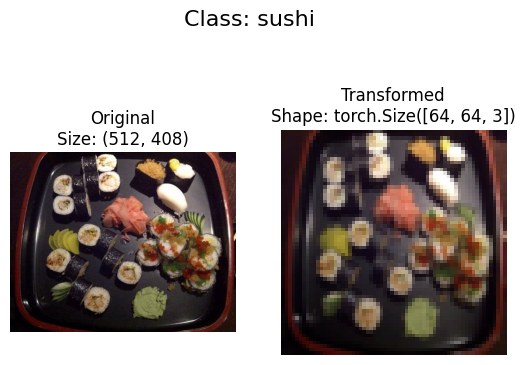

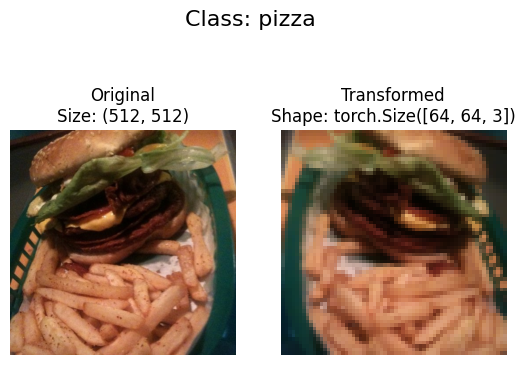

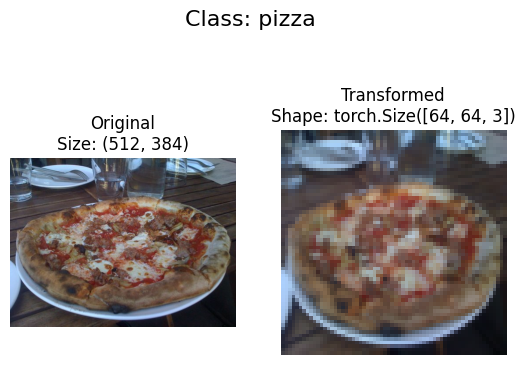

In [16]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms 
    then then plots the orginal vs the transformed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # we will need to change shape for the mat
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=42)

In [17]:
## 4. Option 1 : Loading image data using [ImageFolder]

# We can load image classification data using `torchvision.datasets.ImageFolder`

# https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [18]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                transform=data_transform, # a transform for the data
                                target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                transform= data_transform,
                                target_transform=None)

print(f"the train data dir: {train_dir}")
print(f"the test data dir: {test_dir}")
print("====================================================================")
print(f"Train data class: {train_data.classes}")
print(f"Train data: {train_data}")
print("====================================================================")
print(f"Test data class: {test_data.classes}")
print(f"Test data: {test_data}")

the train data dir: data\pizza_steak_sushi\train
the test data dir: data\pizza_steak_sushi\test
Train data class: ['pizza', 'steak', 'sushi']
Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data class: ['pizza', 'steak', 'sushi']
Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [19]:
# Index on the train_data Dataset to get a single image and label
# train_data[0] --> [Format in Tensor array[0] && the label index [1]]

img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Img permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

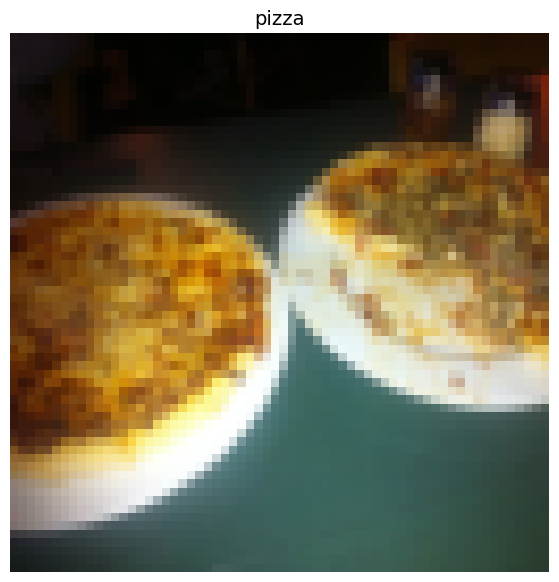

In [20]:
# rearrange the order dimensions
img_permute = img.permute(1, 2, 0)
class_names = train_data.classes
# print out differenet shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Img permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [21]:
# 4.1 Turn loaded images into `Dataloader`'s

# A DataLoader is going to help us turn our Dataset's into iterabkes and 
# we can customise the batch_size so our model can se batch_size images at a time.


In [22]:
import os
os.cpu_count()

16

In [23]:
BATCH_SIZE = 16

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x25b617d3f50>,
 <torch.utils.data.dataloader.DataLoader at 0x25b6194c590>)

In [24]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [25]:
img, label = next(iter(train_dataloader))

#Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batrch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([16, 3, 64, 64]) -> [batrch_size, color_channels, height, width]
Label shape: torch.Size([16])


In [26]:
## 5 Option 2 : Loading Image Data with a Custom `Dataset`
# 1. want to be able to load images from file
# 2. want to be able to get class names from the dataset
# 3. want to be able to get classes as dictionary from the Dataset

# Pros: 
# 1. Can Create a dataset out of almost anything
# 2. Not Limited to pytorch pre-built Dataset functions

# Cons: 
# 1. Even you could create adataset out of anything, it doesnt mean it will work..
# 2. Using a Custom Dataset often results in us writing more code wich could be prone to errors or performance issues.


In [27]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [29]:
### 5.1 Create a helper function to get classnames
# wnat a function to :
# 1. Get the class names using os.scandir to traverse a target directory (ideally the directory is standard image classification format).
# 2. Raise an error if the class names arent found (if this happens, there might be something wrong with the directory structure).
# 3. Turn the class names into a dict and a list and return them.

In [30]:
# Set up path for target directory
target_directory = train_dir
print(f"Train dir: {target_directory }")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
print(f"the folders name in the target dir: {class_names_found}")


Train dir: data\pizza_steak_sushi\train
the folders name in the target dir: ['pizza', 'steak', 'sushi']


In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: 
    """
    Finds the class folder names in a target directory.
    """
    # 1. Get the class names by scanniung the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir()) 

    # 2, Raise an error if class names could nopt be found
    if not classes:
         raise FileNotFoundError(f"Couldn't fint any classes in {directory}... plesase check file structure.")

    # 3. Create a dictionary of index labels(computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [32]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [33]:
# impletement ImageFolder function
## 5.2 Create a custom Dataset to replicate ImageFolder

# To Create our won custom dataset, we want to: 
# 1. SubClass torch.utils.data.dataset
# 2. Init our subclass with a target directory (the directory we'd like to get data from) as well as trasform if we'd like to transform our data/
# 3. Create several attributes: 
#  Paths - paths our images
#  transform - the transform we'd like to use
#  classes - a list of the target classes
#  class_to_idx - a dict of the target classes mapped to integer labels
# 4. Create a function to load_images(), this function will open an iumage
# 5. Overwrite the __len()__ method to return the length of our dataset
# 6. Overwrite the __getitem()__ methoid to return a given sample when passed an index



In [34]:
# # Write a custom dataset class
# # MARK THIS IF EVER NEED TO CUSTOM FUNCTION WITH PYTHON
# from torch.utils.data import Dataset

# # 1. Sub class torch.utils.data.Dataset
# class ImageFolderCustom(Dataset):
#     # 2. Initialize our custome dataset
#     def __init__(self, 
#                  targ_dir: str, 
#                  transform=None):
#         #3. Create class attributes
#         # get all of the image paths
#         self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
#         # Set up transforms
#         self.transform = transform
#         #Create classes and class_to_idx attribute 
#         self.classes, self.class_to_idx = find_classes(targ_dir)

#     # 4. Create a function to load images
#     def load_image(self, index: int) -> Image.Image:
#         "Open an image via a path and return it."
#         image_path = self.paths[index]
#         return Image.open(image_path)

#     # 5. Overwrite __len__()
#     def __len__(self) -> int: 
#         "returns the total number of samples."
#         return len(self.paths)

#     # 6. Overwrite __getitem__() method to return a particular sample
#     def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
#         "Returns one sample of data, data and label (X, y)."
#         img = self.load_image(index)
#         class_name = self.paths[index].parent.name # expects path in format: data_folder/ class_name / image.jpg
#         class_idx = self.class_to_idx[class_name]
#         # Transform if necessary
#         if self.transform: 
#             return self.transform(img), class_idx # return data , label (X, y)
#         else:
#             return img, class_idx # return untransformed image and label



# Copied Code ===========================
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [35]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize( size = (64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [36]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                     transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir= test_dir,
                                    transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x25b53f56d50>,
 <__main__.ImageFolderCustom at 0x25b61cfea50>)

In [37]:
len(train_data_custom), len(train_data), len(test_data_custom), len(test_data)

(225, 225, 75, 75)

In [38]:
### 5.3 Create a function to display random images

# 1. take in a Dataset and a number of other parameters such as class names and how many images to visualize.
# 2. To prevent the display getting out of hand, lets cap the number of images to see at 10.
# 3. Set the random seed for reproducibility 
# 4. Get a list of random sample indexes from the target dataset.
# 5. Setup a matplotlib plot. 
# 6. Loop throught the random sample iumages and plot them with matplottib
# 7， Make sure the dimensions of our iamges line up with matplotlib (HWC)

# -------------------------------

# 1. Create a function to take a dataset
def display_random_images(dataset: torch.utils.data.Dataset, 
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    # 2. Adjust display if n is too high 
    if n > 10:
        n = 10
        display_shape = False
        print(f"for display, purposes, n should not be larger than 10, seeting to 10 and removing shape display.")
    # 3. Set the seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes 
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Set up plot
    plt.figure(figsize=(16, 8))
    
    # 6. Loop through random indexes and plot them with matplotlib
    for i, targ_sample in enumerate(random_samples_idx): 
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        # 7. adjust tensor dimensions for plotting
        targ_image_adjust = targ_image.permute(1, 2, 0) # [color_channels, height, width] -> [height, width, color_channels]

        # plot adjusted samples
        plt.subplot(1, n, i + 1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

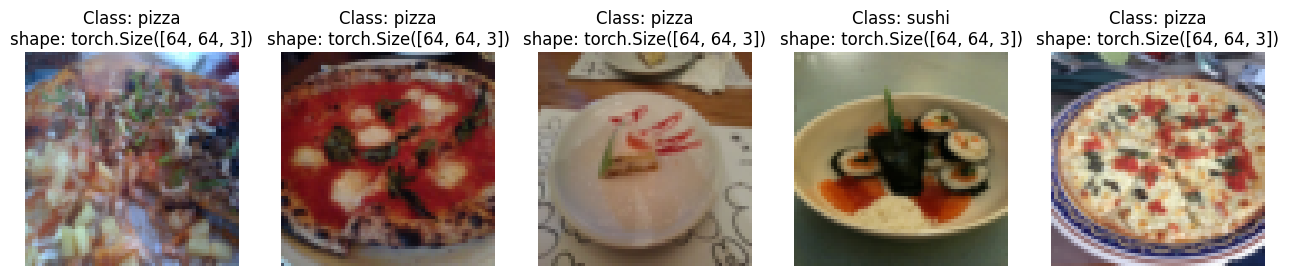

In [39]:
display_random_images(train_data_custom,
                     n=5,
                     classes=class_names,
                     seed=None)

In [40]:
## 5.4 Turn Custom loaded images into DataLoader's 

from torch.utils.data import DataLoader

BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()
print(f"I have {NUM_WORKERS} cores in my cpu")
# for some reason i cant set cpu workers to be the cpu_count
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = 0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = 0,
                                    shuffle= False)

train_dataloader_custom, test_dataloader_custom

I have 16 cores in my cpu


(<torch.utils.data.dataloader.DataLoader at 0x25b61dde950>,
 <torch.utils.data.dataloader.DataLoader at 0x25b61d88e50>)

In [41]:
### Get image and label from custom dataloader 
img_custom, label_custom = next(iter(train_dataloader_custom))

#Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64]))

In [42]:
## there also some other forms of transforms worth to check ot EX: [Rotate, shift, zoom, trivialaugmentwide]

In [43]:
## 7. Model: Tinny vgg without data augmentation
# let replicate tinyvgg architecture from the cnn Explainer website:  [see example code]

In [44]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [45]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                       transform = simple_transform)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

# 2. Turn the datasets into dataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create dataloader's 
train_dataloader_simple = DataLoader(dataset = train_data_simple,
                                     batch_size = BATCH_SIZE,
                                     shuffle= True,
                                     num_workers = NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle= False,
                                    num_workers = NUM_WORKERS)

In [46]:
## Create CNN (Tiny Vgg) -- [Once again]
## 7.2 Create Tiny VGG model class
class TinyVGG(nn.Module):
    """
        Model architecture copying tinyvgg from cnn explainer
    """
    def __init__(self, input_shape: int, hidden_shape: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_shape,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_shape,
                      out_channels = hidden_shape,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_shape,
                      out_channels = hidden_shape,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_shape,
                      out_channels = hidden_shape,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_shape * 13 * 13,
                     out_features = output_shape)
        )
        
    def forward(self, x): 
        x = self.conv_block_1(x)
        print(f"The shaope now after conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        print(f"The shaope now after conv_block_2: {x.shape}")
        x = self.classifier(x)
        print(f"The final shape after classifier: {x.shape}")
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benifits from operator fusion
        
            

In [47]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels in our image data
                 hidden_shape = 10,
                 output_shape = len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [48]:
### 7.3 Try a forward pass on a single image 【to test the model】
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [49]:
model_0(image_batch.to(device))

The shaope now after conv_block_1: torch.Size([32, 10, 30, 30])
The shaope now after conv_block_2: torch.Size([32, 10, 13, 13])
The final shape after classifier: torch.Size([32, 3])


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0238e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2689e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [51]:
### 7.4 Use `torchinfo` to get an idea of the shaes going through our model
from torchinfo import summary
summary(model_0, input_size = [1, 3, 64, 64])

The shaope now after conv_block_1: torch.Size([1, 10, 30, 30])
The shaope now after conv_block_2: torch.Size([1, 10, 13, 13])
The final shape after classifier: torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
### 7.4 Create train and test loops functions
# `train_step()` - takes in a model and dataloader and trains the model on the dataloader 
# `test_step()` - takes in a modell nad dataloader and evaluates the model on dataloader.

In [53]:
# Create train_step()
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device = device):
    # Put the model in train mode 
    model.train()
    # set up train loss and train accuracy values 
    train_loss, train_acc = 0, 0
    
    # loop through data loader data batches 
    for batch, (X, y) in enumerate(dataloader): 
        # Send data to the target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X) # output model logits
        
        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grand 
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step 
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
        
    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
        

In [54]:
# Create a test step
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             device = device):
    # Put model in eval mode
    model.eval()
    
    # setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # turn on inference mode
    with torch.inference_mode: 
        # Loop through DataLoader batches 
        for batch, (X, y) in enumerate(dataloader):
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred_logits = model(X)
            # 2. Calculate the loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate the accuracy
            test_pred_labels = test_pred_logits.argmax(dim = 1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))
    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc
    

In [62]:
### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`
from tqdm.auto import tqdm 

# 1. Create a train function that takes in various model parameters + optimizer + dataloader
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
    # 2. Create empty results dictionary 
    results = {"train_loss": [],
              "train_acc": [],
              "train_loss": [],
              "test_acc": []}
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn = loss_fn,
                                          optimizer = optimizer, 
                                          device=device)
        test_loss, test_acc = test_step(model=model,
                                       dataloader= test_dataloader,
                                       loss_fn=loss_fn,
                                       device= device)
        # 4. print our what is happening
        print("==================================")
        print(f"Report or Epoch Num ---{epoch}---")
        print(f"| Train loss: {train_loss:.4f}  |")
        print(f"| Train acc: {train_acc:.4f}    |")
        print(f"| Test loss: {test_loss: .4f}   |")
        print(f"| Test acc: {test_acc: .4f}     |")
        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    # 6. Return the filled result at the end of the epochs
    return results

In [ ]:
# 7.7 train and evaluate model 0
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set number of epochs
NUM_EPOCHS = 5

# Recate an instance of TinyVGG
model_0 = TinyVGG()

train( model = model_0, dataloader = train_dataloader_simple, loss_fn = )